In [5]:
from __future__ import print_function
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageFont, ImageDraw
import glob
from scipy import ndimage, misc
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

import random
import itertools

In [3]:
nb=5
a=np.linspace(0, nb-1, nb, dtype=int)
print(a)

[0 1 2 3 4]


In [7]:
def create_digit_img(digit, side):
    background =Image.new('RGB', (side, side), color = (255, 255, 255))
    font = ImageFont.truetype('../sudoku/font2/Lato-Black.ttf', 12)
    text=str(digit)
    draw = ImageDraw.Draw(background)
    #if digit>0:
    text_width, text_height = draw.textsize(text, font)
    position = ((side-text_width)/2,(side-text_height)/2)
    color=(0, 0, 0)
    draw.text(position, text, color, font=font)
    img=np.array(background)
    img=0.2989*img[:, :, 0]+0.5870*img[:, :, 1]+0.1140*img[:, :, 2]
    
    return img

def draw_lines(img, side, nn):
    
    ll=np.shape(img)[0]
    print(nn)
    for i in range(0, nn+1):
        print(i)
        if i in [0, 1, 2, 3, 4, 6]:
            img[side*i+1, 0:ll]=0
            img[0:ll, side*i+1]=0
        elif i==9:
            img[side*i-1, 0:ll]=0
            img[0:ll, side*i-1]=0
            
        img[side*i, 0:ll]=0
        img[0:ll, side*i]=0
    return img




    


In [36]:
# import random

nb=7 # number of black case
mx=25 #total number of cases



#'Ad Hominem', false dichotomy, Bandwagon fallacy, False cause
list_of_biais=['cherry picking', 'straw man', 'false equivalence', 'dunning-Kruger', 'Confirmation Bias', 'Expectation bias', 'Framing Effect', 'Hot hand fallacy', 'IKEA effect', 'Groupthink', 'Belief bias']
list2=['Selection Bias', 'Survivor-ship bias', 'Parkinson’s law \n of triviality', 'Third person effect', 'Restraint bias', 'Ostrich effect']

list3=['Availability cascade', 'clustering illusion', 'Declinism', 'Decoy effect', 'Duration neglect', 'Framing effect', 'Gender Bias', 'Impact Bias']
list_of_biais.extend(list2)
list_of_biais.extend(list3)

print(len(list_of_biais))
print(list_of_biais)
random.shuffle(list_of_biais)
print(list_of_biais)

a=np.linspace(0, mx-1, mx, dtype=int)
print(a)
print(type(a))
print(nb)
lst_b=random.sample(list(a), nb)
print(lst_b)

num_lst=mx-nb
lst_x=random.sample(list_of_biais, num_lst)

25
['cherry picking', 'straw man', 'false equivalence', 'dunning-Kruger', 'Confirmation Bias', 'Expectation bias', 'Framing Effect', 'Hot hand fallacy', 'IKEA effect', 'Groupthink', 'Belief bias', 'Selection Bias', 'Survivor-ship bias', 'Parkinson’s law \n of triviality', 'Third person effect', 'Restraint bias', 'Ostrich effect', 'Availability cascade', 'clustering illusion', 'Declinism', 'Decoy effect', 'Duration neglect', 'Framing effect', 'Gender Bias', 'Impact Bias']
['Hot hand fallacy', 'Ostrich effect', 'Impact Bias', 'Selection Bias', 'Groupthink', 'dunning-Kruger', 'Restraint bias', 'Survivor-ship bias', 'IKEA effect', 'Duration neglect', 'clustering illusion', 'Framing Effect', 'Parkinson’s law \n of triviality', 'Availability cascade', 'Framing effect', 'Belief bias', 'Decoy effect', 'cherry picking', 'Expectation bias', 'false equivalence', 'straw man', 'Declinism', 'Third person effect', 'Confirmation Bias', 'Gender Bias']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16

In [37]:
print(num_lst)
print(len(list_of_biais))

18
25


In [38]:

side=120 #Size of one cell
nn=5


backgr=np.ones((nn*side+1, nn*side+1))*255
#print(ll)
#put digits:
k=0

hh=5
kk=0
for i in range(0, nn):
    for j in range(0, nn):
        
        if kk in lst_b:
            backgr[i*side:(i+1)*side, j*side:(j+1)*side]=np.ones((np.shape(backgr[i*side:(i+1)*side, j*side:(j+1)*side])), dtype=int)*10
            print(i, j)
        else:
            #print(k)
            digit=lst_x[k]
            k=k+1
            img=create_digit_img(digit, side)
            backgr[i*side:(i+1)*side, j*side:(j+1)*side]=img
            
        #print(kk)
        
        kk=kk+1
#print(lst_x)
backgr=draw_lines(backgr, side, nn)

0 2
0 4
1 2
2 1
2 2
2 4
4 1
5
0
1
2
3
4
5


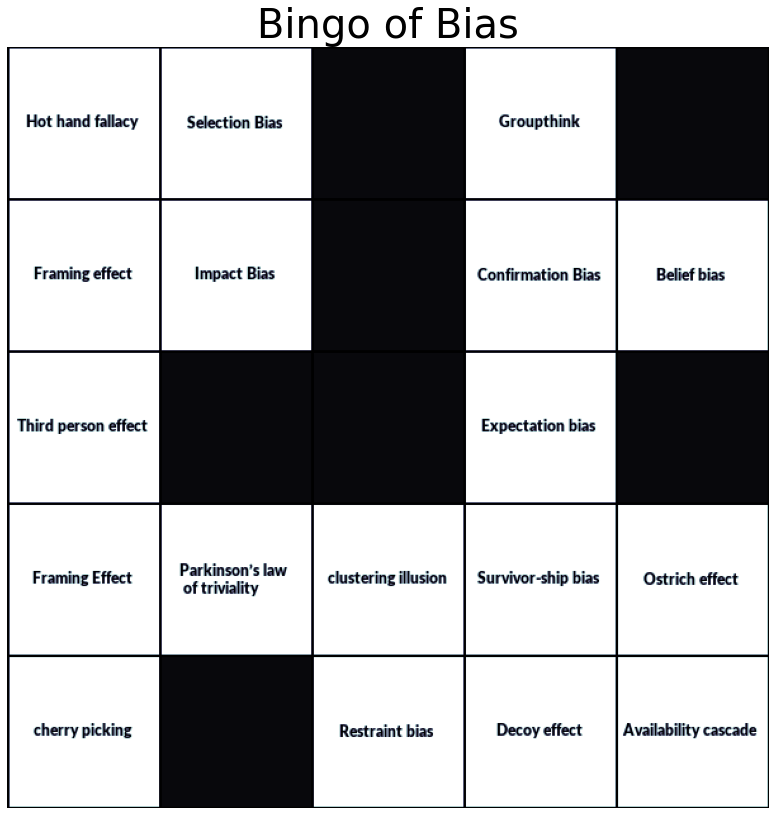

In [39]:

f = plt.figure(figsize=(14,14))
plt.imshow(backgr, cmap='bone')
plt.title('Bingo of Bias',fontsize=40)
plt.axis('off')
plt.savefig('img3.png')
plt.show()

In [30]:
type(backgr)

numpy.ndarray